ETAPA 3: Visualizaciones avanzadas
* Objetivo: Profundizar en el análisis visual, comparando regiones y tendencias.
* Rango temporal:  2 años de datos (2021–2022).
* Dificultad: Media-alta – manipulación de datasets grandes y generación de gráficos agregados.

In [47]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
import sys
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [48]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

In [49]:
start_date = datetime(2021,1,1)
end_date = datetime(2022,12,31)

dates = pd.date_range(start=start_date, end=end_date, freq="D")

Antes de optimizar:

In [50]:
start_time = time.time()

dframes = []
a = 0

for d in dates:
    archivo = d.strftime("%m-%d-%Y") + ".csv"
    url = base_url + archivo
    try:
        df = pd.read_csv(url)
        df["source_file"] = archivo
        dframes.append(df)
        a += 1
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

DF2021_2022 = pd.concat(dframes, ignore_index=True)

end_time = time.time()
memoria_DF2021_2022 = DF2021_2022.memory_usage(deep=True).sum() / 1024 / 1024

print("Tiempo:", end_time - start_time, "segundos")
print("Memoria:", memoria_DF2021_2022, "MB")

Tiempo: 102.88671088218689 segundos
Memoria: 1208.714566230774 MB


Optimización:

In [51]:
start_time = time.time()

dframes = []
a = 0

for d in dates:
    archivo = d.strftime("%m-%d-%Y") + ".csv"
    url = base_url + archivo
    try:
        for chunk in pd.read_csv(url, chunksize=50000):
            chunk["source_file"] = archivo
            dframes.append(chunk)
            a += 1
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

DF2021_2022_opt = pd.concat(dframes, ignore_index=True)

end_time = time.time()
memoria_DF2021_2022_opt = DF2021_2022_opt.memory_usage(deep=True).sum() / 1024 / 1024

print("Tiempo OPTIMIZADO:", end_time - start_time, "segundos")
print("Memoria OPTIMIZADA:", memoria_DF2021_2022_opt, "MB")

Tiempo OPTIMIZADO: 63.427138328552246 segundos
Memoria OPTIMIZADA: 1208.714566230774 MB


In [52]:
DF2021_2022_opt.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,source_file
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727.0,8585.0,Afghanistan,134.896578,4.191343,01-01-2021.csv
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634.0,23501.0,Albania,2026.409062,2.025173,01-01-2021.csv
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395.0,29740.0,Algeria,227.809861,2.764848,01-01-2021.csv
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463.0,570.0,Andorra,10505.403482,1.034865,01-01-2021.csv
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146.0,6017.0,Angola,53.452981,2.305328,01-01-2021.csv


In [53]:
DF2021_2022_opt["Last_Update"] = pd.to_datetime(DF2021_2022_opt["Last_Update"], errors="coerce")

In [54]:
DF2021_2022_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931108 entries, 0 to 2931107
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FIPS                 float64       
 1   Admin2               object        
 2   Province_State       object        
 3   Country_Region       object        
 4   Last_Update          datetime64[ns]
 5   Lat                  float64       
 6   Long_                float64       
 7   Confirmed            int64         
 8   Deaths               int64         
 9   Recovered            float64       
 10  Active               float64       
 11  Combined_Key         object        
 12  Incident_Rate        float64       
 13  Case_Fatality_Ratio  float64       
 14  source_file          object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(5)
memory usage: 335.4+ MB


In [55]:
DF2021_2022_opt.isnull().sum()

,0
FIPS,546018
Admin2,542820
Province_State,130650
Country_Region,0
Last_Update,37
Lat,66158
Long_,66158
Confirmed,0
Deaths,0
Recovered,2554964


In [56]:
DF2021_2022_opt.drop(columns=["FIPS","Admin2"],inplace=True)
DF2021_2022_opt.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,source_file
0,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727.0,8585.0,Afghanistan,134.896578,4.191343,01-01-2021.csv
1,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634.0,23501.0,Albania,2026.409062,2.025173,01-01-2021.csv
2,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395.0,29740.0,Algeria,227.809861,2.764848,01-01-2021.csv
3,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463.0,570.0,Andorra,10505.403482,1.034865,01-01-2021.csv
4,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146.0,6017.0,Angola,53.452981,2.305328,01-01-2021.csv


In [57]:
DF2021_2022_opt["Recovered"] = DF2021_2022_opt["Recovered"].fillna(0)
DF2021_2022_opt["Active"] = DF2021_2022_opt["Active"].fillna(0)

In [58]:
DF2021_2022_opt.columns = DF2021_2022_opt.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

In [59]:
DF2021_2022_opt.columns

Index(['province_state', 'country_region', 'last_update', 'lat', 'long_',
       'confirmed', 'deaths', 'recovered', 'active', 'combined_key',
       'incident_rate', 'case_fatality_ratio', 'source_file'],
      dtype='object')

In [60]:
DF2021_2022_opt.loc[DF2021_2022_opt["country_region"] == "US", "country_region"] = "United States"

In [61]:
DF2021_2022_opt["last_update"] = DF2021_2022_opt["last_update"].dt.date
DF2021_2022_opt["last_update"].head()

,last_update
0,2021-01-02
1,2021-01-02
2,2021-01-02
3,2021-01-02
4,2021-01-02


In [62]:
DF2021_2022_opt["active_cases"] = DF2021_2022_opt["confirmed"] - DF2021_2022_opt["deaths"] - DF2021_2022_opt["recovered"]

In [63]:
DF2021_2022_opt["fatality_rate"] = np.where(DF2021_2022_opt["confirmed"] > 0, (DF2021_2022_opt["deaths"] / DF2021_2022_opt["confirmed"]) * 100, np.nan)

Antes de optimizar:

In [64]:
mem_before = DF2021_2022_opt.memory_usage(deep=True).sum() / 1024 / 1024
print("Memoria:", mem_before, "MB")

Memoria: 1033.47096824646 MB


Optimizar:

In [67]:
# convertir valores numéricos grandes
for col in ["confirmed", "deaths", "recovered", "active_cases"]:
    DF2021_2022_opt[col] = DF2021_2022_opt[col].astype("Int32")

for col in ["incident_rate", "case_fatality_ratio"]:
    DF2021_2022_opt[col] = DF2021_2022_opt[col].astype("Float32")

# convertir strings a categorías
for col in ["country_region", "province_state"]:
    DF2021_2022_opt[col] = DF2021_2022_opt[col].astype("category")

mem_after = DF2021_2022_opt.memory_usage(deep=True).sum() / 1024 / 1024

print("Memoria OPTIMIZADA:", mem_after, "MB")
print("Reducción de memoria:", mem_before - mem_after, "MB")

Memoria OPTIMIZADA: 666.5488595962524 MB
Reducción de memoria: 366.9221086502075 MB


In [68]:
porop = ((mem_before-mem_after)/mem_before)*100
print(f"Porcentaje de optimizacion {porop:.3f}")

Porcentaje de optimizacion 35.504


Antes de optimizar:

In [69]:
start = time.time()

DF2021_2022_opt["fatality_apply"] = DF2021_2022_opt.apply(
    lambda row: (row["deaths"] / row["confirmed"]) * 100
    if row["confirmed"] > 0 else np.nan, axis=1)

end = time.time()
print("Tiempo:", end - start, "segundos")

Tiempo: 33.114519119262695 segundos


Optimizar:

In [82]:
start = time.time()

DF2021_2022_opt["fatality_vectorized"] = np.where(
    DF2021_2022_opt["confirmed"] > 0,
    (DF2021_2022_opt["deaths"] / DF2021_2022_opt["confirmed"]) * 100, np.nan)

end = time.time()
print("Tiempo OPTIMIZADO", end - start, "segundos")

Tiempo OPTIMIZADO 0.0675806999206543 segundos


1. Evolución temporal global de casos confirmados, activos y fallecidos (líneas).

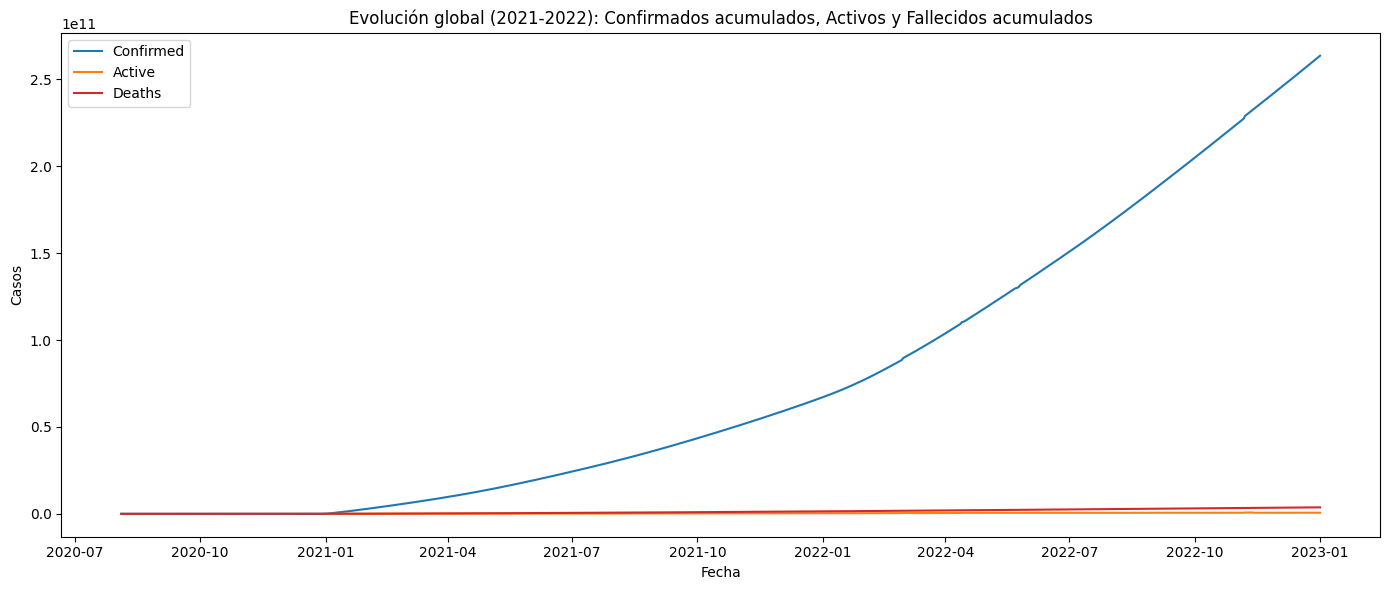

In [105]:
evolucion_global = DF2021_2022_opt.groupby("last_update")[["confirmed","active_cases","deaths"]].sum().sort_index()

plt.figure(figsize=(14,6))
plt.plot(evolucion_global.index, evolucion_global["confirmed"].cumsum(), label="Confirmed", color="C0")
plt.plot(evolucion_global.index, evolucion_global["active_cases"].rolling(7).mean(), label="Active", color="C1")
plt.plot(evolucion_global.index, evolucion_global["deaths"].cumsum(), label="Deaths", color="C3")
plt.title("Evolución global (2021-2022): Confirmados acumulados, Activos y Fallecidos acumulados")
plt.xlabel("Fecha")
plt.ylabel("Casos")
plt.legend()
plt.tight_layout()
plt.show()

2. Comparativa Top 10 países con más casos confirmados (barras).

/tmp/ipython-input-4029327243.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_paises,


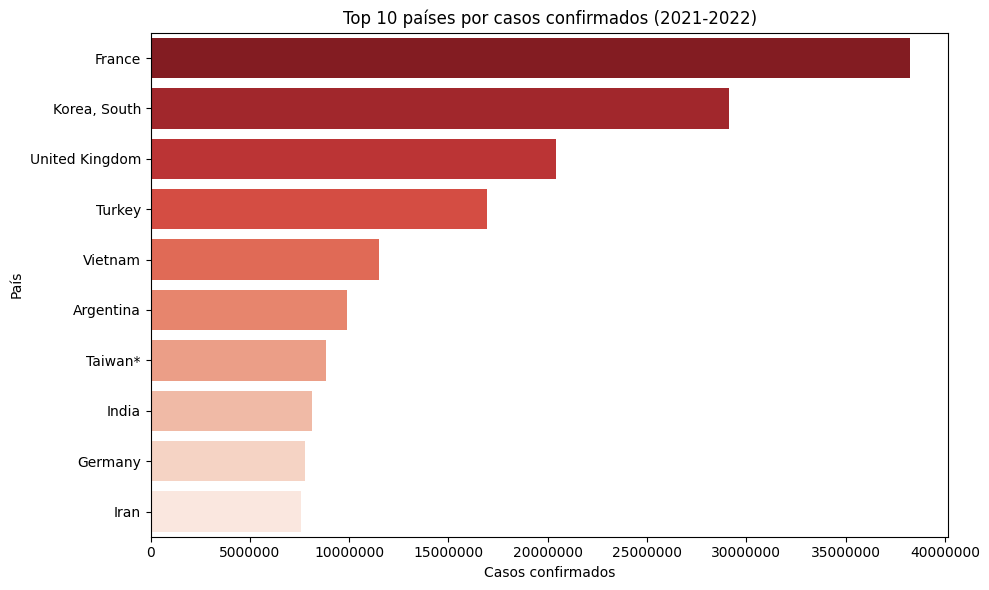

In [106]:
paises_totales = DF2021_2022_opt.groupby("country_region", observed=True)["confirmed"].max().sort_values(ascending=False)

top10_paises = paises_totales.head(10).reset_index()
top10_paises.columns = ['Pais', 'Casos']
top10_paises['Pais'] = top10_paises['Pais'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_paises,
            x='Casos',
            y='Pais',
            palette="Reds_r")
plt.title("Top 10 países por casos confirmados (2021-2022)")
plt.xlabel("Casos confirmados")
plt.ylabel("País")
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

3. Heatmap de correlaciones entre columnas relevantes (confirmados, fallecidos, activos,
ratio).

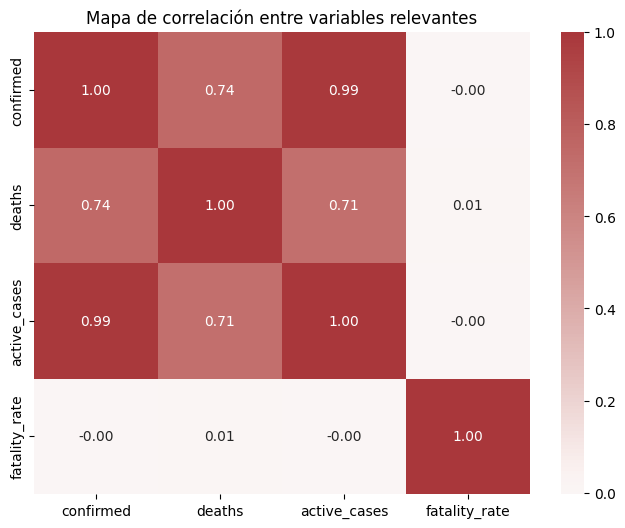

In [107]:
corr_cols = ["confirmed","deaths","active_cases","fatality_rate"]
corr_df = DF2021_2022_opt[corr_cols].replace([np.inf,-np.inf], np.nan).dropna()
corr = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Mapa de correlación entre variables relevantes")
plt.show()

4. Gráfico de barras horizontales comparando tasas de letalidad por continente.

/tmp/ipython-input-4013705886.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continente["fatality_rate"], y=continente.index, palette="coolwarm")


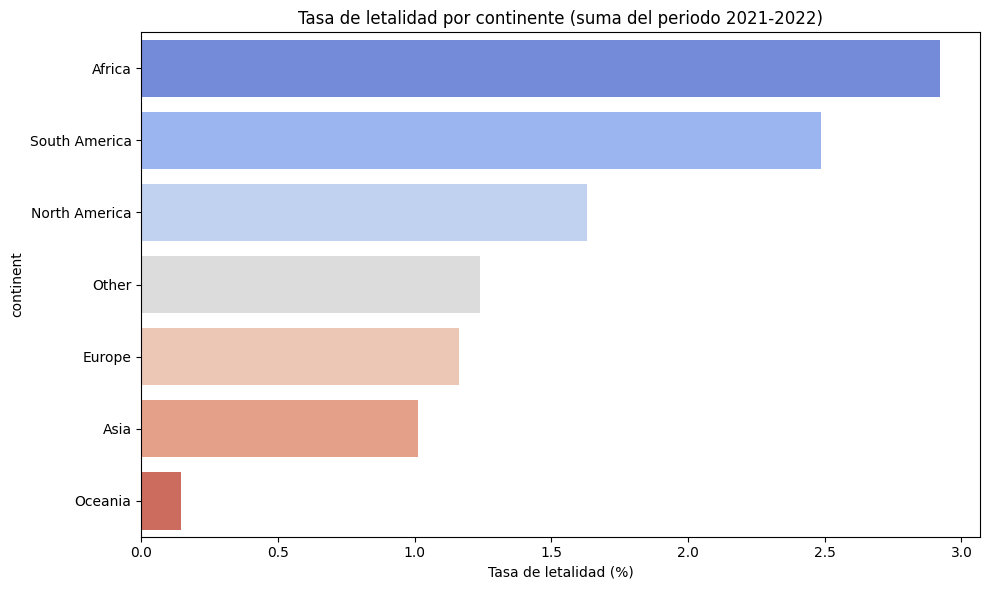

In [108]:
# Asignar continentes mediante un diccionario básico
continent_map = {
    "United States":"North America","Canada":"North America","Mexico":"North America",
    "Brazil":"South America","Argentina":"South America","Chile":"South America","Colombia":"South America","Peru":"South America",
    "United Kingdom":"Europe","France":"Europe","Germany":"Europe","Italy":"Europe","Spain":"Europe","Russia":"Europe",
    "India":"Asia","China":"Asia","Japan":"Asia","South Korea":"Asia","Turkey":"Asia",
    "Australia":"Oceania","New Zealand":"Oceania",
    "South Africa":"Africa","Nigeria":"Africa","Egypt":"Africa"
}

# crear columna continent
DF2021_2022_opt["continent"] = DF2021_2022_opt["country_region"].map(continent_map).fillna("Other")

# calcular tasa de letalidad promedio por continente (usar sum de deaths/sum of confirmed para mayor robustez)
continente = DF2021_2022_opt.groupby("continent").agg({"deaths":"sum","confirmed":"sum"})
continente["fatality_rate"] = np.where(continente["confirmed"]>0, continente["deaths"]/continente["confirmed"]*100, np.nan)
continente = continente.sort_values("fatality_rate", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=continente["fatality_rate"], y=continente.index, palette="coolwarm")
plt.xlabel("Tasa de letalidad (%)")
plt.title("Tasa de letalidad por continente (suma del periodo 2021-2022)")
plt.tight_layout()
plt.show()


5. Mapa o gráfico geográfico que muestre la incidencia por continente o país (opcional).

In [120]:
!pip install geopandas
!pip install geodatasets
import geopandas as gpd
import geodatasets

In [124]:
mapa_geografico = DF2021_2022_opt.sort_values("confirmed", ascending=False).groupby("country_region").agg({
    "lat": "first", "long_": "first", "confirmed": "max"}).reset_index().dropna(subset=["lat","long_"])

/tmp/ipython-input-3506147498.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mapa_geografico = DF2021_2022_opt.sort_values("confirmed", ascending=False).groupby("country_region").agg({


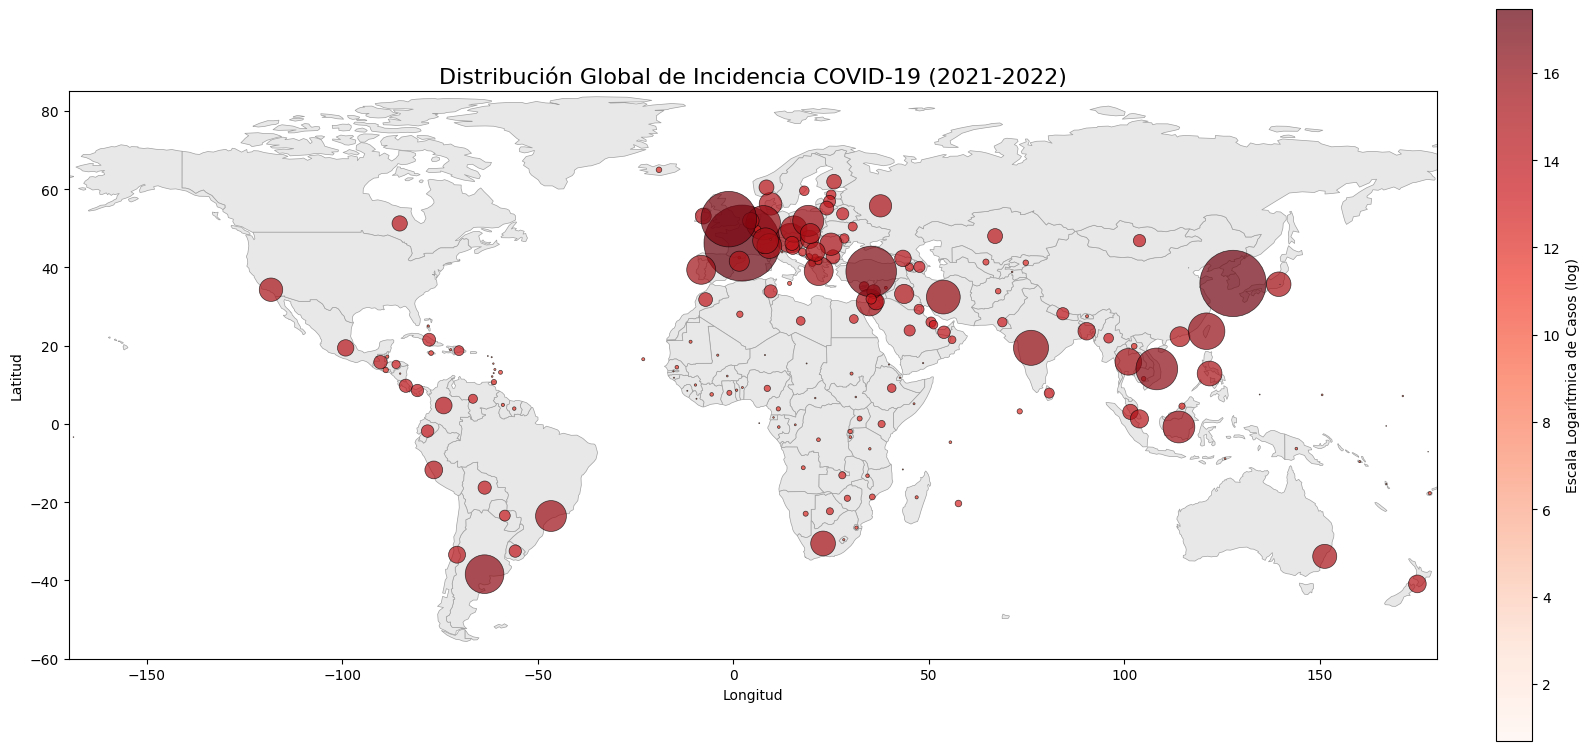

In [132]:
try:
    path_mapa = geodatasets.get_path('naturalearth.admin_0_countries')
    world = gpd.read_file(path_mapa)
except:
  world = gpd.read_file("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json")

fig, ax = plt.subplots(figsize=(16, 10))
world.plot(ax=ax, color='#e8e8e8', edgecolor='#a0a0a0', linewidth=0.5)
sizes = (mapa_geografico["confirmed"] / mapa_geografico["confirmed"].max()) * 3000
scatter = ax.scatter(x=mapa_geografico["long_"],
                     y=mapa_geografico["lat"],
                     s=sizes,
                     alpha=0.7,
                     c=np.log1p(mapa_geografico["confirmed"]),
                     cmap="Reds",
                     edgecolor='black',
                     linewidth=0.5,
                     zorder=2)
cbar = plt.colorbar(scatter, ax=ax, fraction=0.025, pad=0.04)
cbar.set_label("Escala Logarítmica de Casos (log)")
plt.title("Distribución Global de Incidencia COVID-19 (2021-2022)", fontsize=16)
plt.xlabel("Longitud")
plt.ylabel("Latitud")

plt.xlim([-170, 180])
plt.ylim([-60, 85])
plt.tight_layout()
plt.show()